## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  69.566306  1217.705718  0.906404  8.723357  1.516861
1  63.312155  1621.291954  0.711106  4.352541  1.416685
2  18.724530  1235.428756  0.572278  7.233406  1.378632
3  10.700600   726.763306  0.861834  9.559240  1.507297
4  79.312159  1554.033249  0.089637  5.571614  0.978149


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0108799	total: 67ms	remaining: 1m 6s
1:	learn: 1.0024924	total: 67.5ms	remaining: 33.7s
2:	learn: 0.9947785	total: 68ms	remaining: 22.6s
3:	learn: 0.9869808	total: 68.5ms	remaining: 17.1s
4:	learn: 0.9783934	total: 69.1ms	remaining: 13.8s
5:	learn: 0.9719116	total: 69.7ms	remaining: 11.5s
6:	learn: 0.9631065	total: 70.2ms	remaining: 9.96s
7:	learn: 0.9545320	total: 70.8ms	remaining: 8.78s
8:	learn: 0.9468062	total: 71.2ms	remaining: 7.84s
9:	learn: 0.9392625	total: 71.8ms	remaining: 7.11s
10:	learn: 0.9309567	total: 72.3ms	remaining: 6.5s
11:	learn: 0.9232984	total: 72.8ms	remaining: 5.99s
12:	learn: 0.9142712	total: 73.3ms	remaining: 5.57s
13:	learn: 0.9057921	total: 73.8ms	remaining: 5.19s
14:	learn: 0.8974209	total: 74.2ms	remaining: 4.87s
15:	learn: 0.8900122	total: 74.6ms	remaining: 4.59s
16:	learn: 0.8822486	total: 75.1ms	remaining: 4.34s
17:	learn: 0.8730847	total: 75.6ms	remaining: 4.12s
18:	learn: 0.8664054	total: 76.1ms	remaining: 3.9

93:	learn: 0.4961427	total: 108ms	remaining: 1.04s
94:	learn: 0.4930208	total: 109ms	remaining: 1.04s
95:	learn: 0.4899619	total: 109ms	remaining: 1.03s
96:	learn: 0.4871382	total: 110ms	remaining: 1.02s
97:	learn: 0.4841468	total: 110ms	remaining: 1.01s
98:	learn: 0.4816506	total: 111ms	remaining: 1.01s
99:	learn: 0.4783973	total: 111ms	remaining: 1s
100:	learn: 0.4754022	total: 112ms	remaining: 993ms
101:	learn: 0.4722507	total: 112ms	remaining: 986ms
102:	learn: 0.4686922	total: 112ms	remaining: 979ms
103:	learn: 0.4660908	total: 113ms	remaining: 972ms
104:	learn: 0.4629991	total: 113ms	remaining: 966ms
105:	learn: 0.4605403	total: 114ms	remaining: 960ms
106:	learn: 0.4580519	total: 114ms	remaining: 954ms
107:	learn: 0.4551258	total: 115ms	remaining: 947ms
108:	learn: 0.4526821	total: 115ms	remaining: 942ms
109:	learn: 0.4496700	total: 116ms	remaining: 937ms
110:	learn: 0.4466014	total: 116ms	remaining: 931ms
111:	learn: 0.4446495	total: 117ms	remaining: 925ms
112:	learn: 0.4423537	

280:	learn: 0.1942724	total: 186ms	remaining: 477ms
281:	learn: 0.1934922	total: 187ms	remaining: 476ms
282:	learn: 0.1928160	total: 187ms	remaining: 474ms
283:	learn: 0.1921219	total: 188ms	remaining: 473ms
284:	learn: 0.1914835	total: 188ms	remaining: 472ms
285:	learn: 0.1908146	total: 188ms	remaining: 471ms
286:	learn: 0.1897990	total: 189ms	remaining: 469ms
287:	learn: 0.1892161	total: 189ms	remaining: 468ms
288:	learn: 0.1883228	total: 190ms	remaining: 466ms
289:	learn: 0.1876495	total: 190ms	remaining: 465ms
290:	learn: 0.1866783	total: 190ms	remaining: 464ms
291:	learn: 0.1858965	total: 191ms	remaining: 463ms
292:	learn: 0.1852258	total: 191ms	remaining: 462ms
293:	learn: 0.1846358	total: 192ms	remaining: 461ms
294:	learn: 0.1835965	total: 192ms	remaining: 459ms
295:	learn: 0.1826588	total: 193ms	remaining: 458ms
296:	learn: 0.1821245	total: 193ms	remaining: 457ms
297:	learn: 0.1814464	total: 194ms	remaining: 456ms
298:	learn: 0.1804860	total: 194ms	remaining: 455ms
299:	learn: 

513:	learn: 0.0790878	total: 291ms	remaining: 275ms
514:	learn: 0.0787691	total: 291ms	remaining: 274ms
515:	learn: 0.0785499	total: 292ms	remaining: 274ms
516:	learn: 0.0784291	total: 292ms	remaining: 273ms
517:	learn: 0.0781758	total: 293ms	remaining: 272ms
518:	learn: 0.0780565	total: 293ms	remaining: 271ms
519:	learn: 0.0778006	total: 293ms	remaining: 271ms
520:	learn: 0.0776825	total: 294ms	remaining: 270ms
521:	learn: 0.0775658	total: 294ms	remaining: 269ms
522:	learn: 0.0773573	total: 294ms	remaining: 268ms
523:	learn: 0.0771051	total: 295ms	remaining: 268ms
524:	learn: 0.0769899	total: 295ms	remaining: 267ms
525:	learn: 0.0768763	total: 295ms	remaining: 266ms
526:	learn: 0.0765707	total: 296ms	remaining: 265ms
527:	learn: 0.0763673	total: 296ms	remaining: 265ms
528:	learn: 0.0761675	total: 296ms	remaining: 264ms
529:	learn: 0.0760566	total: 297ms	remaining: 263ms
530:	learn: 0.0758119	total: 297ms	remaining: 263ms
531:	learn: 0.0757020	total: 298ms	remaining: 262ms
532:	learn: 

698:	learn: 0.0499414	total: 369ms	remaining: 159ms
699:	learn: 0.0498368	total: 369ms	remaining: 158ms
700:	learn: 0.0496660	total: 369ms	remaining: 158ms
701:	learn: 0.0495480	total: 370ms	remaining: 157ms
702:	learn: 0.0494002	total: 370ms	remaining: 156ms
703:	learn: 0.0493522	total: 370ms	remaining: 156ms
704:	learn: 0.0492782	total: 371ms	remaining: 155ms
705:	learn: 0.0491122	total: 371ms	remaining: 155ms
706:	learn: 0.0489087	total: 372ms	remaining: 154ms
707:	learn: 0.0487943	total: 372ms	remaining: 153ms
708:	learn: 0.0487471	total: 373ms	remaining: 153ms
709:	learn: 0.0487006	total: 373ms	remaining: 152ms
710:	learn: 0.0485411	total: 373ms	remaining: 152ms
711:	learn: 0.0484765	total: 374ms	remaining: 151ms
712:	learn: 0.0484128	total: 374ms	remaining: 151ms
713:	learn: 0.0482695	total: 375ms	remaining: 150ms
714:	learn: 0.0482349	total: 375ms	remaining: 150ms
715:	learn: 0.0481486	total: 376ms	remaining: 149ms
716:	learn: 0.0479527	total: 376ms	remaining: 148ms
717:	learn: 

946:	learn: 0.0290356	total: 472ms	remaining: 26.4ms
947:	learn: 0.0289759	total: 473ms	remaining: 25.9ms
948:	learn: 0.0288875	total: 473ms	remaining: 25.4ms
949:	learn: 0.0288340	total: 474ms	remaining: 24.9ms
950:	learn: 0.0287474	total: 474ms	remaining: 24.4ms
951:	learn: 0.0286945	total: 475ms	remaining: 23.9ms
952:	learn: 0.0286370	total: 475ms	remaining: 23.4ms
953:	learn: 0.0285522	total: 475ms	remaining: 22.9ms
954:	learn: 0.0285003	total: 476ms	remaining: 22.4ms
955:	learn: 0.0284447	total: 476ms	remaining: 21.9ms
956:	learn: 0.0283706	total: 477ms	remaining: 21.4ms
957:	learn: 0.0282873	total: 477ms	remaining: 20.9ms
958:	learn: 0.0282331	total: 478ms	remaining: 20.4ms
959:	learn: 0.0281686	total: 478ms	remaining: 19.9ms
960:	learn: 0.0280959	total: 478ms	remaining: 19.4ms
961:	learn: 0.0280145	total: 479ms	remaining: 18.9ms
962:	learn: 0.0279742	total: 479ms	remaining: 18.4ms
963:	learn: 0.0279457	total: 480ms	remaining: 17.9ms
964:	learn: 0.0278930	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

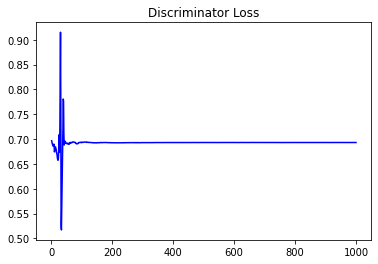

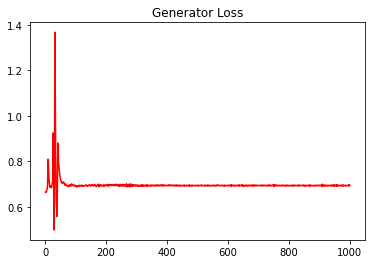

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21255786119013198


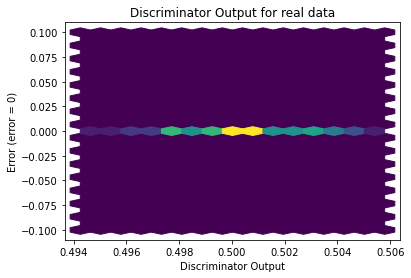

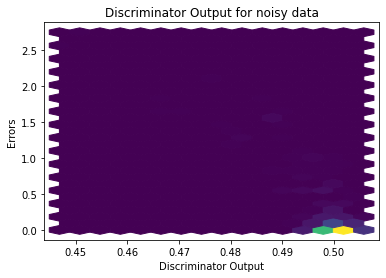

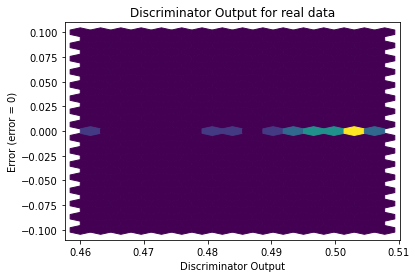

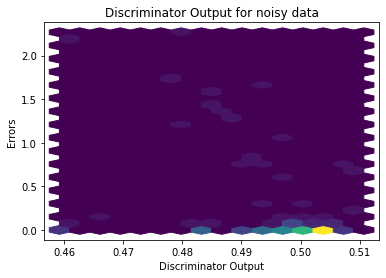

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


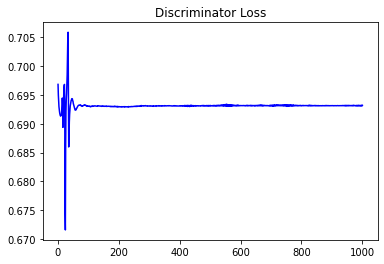

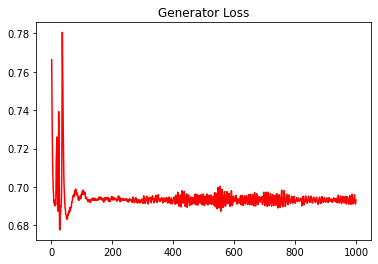

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22083859793412217


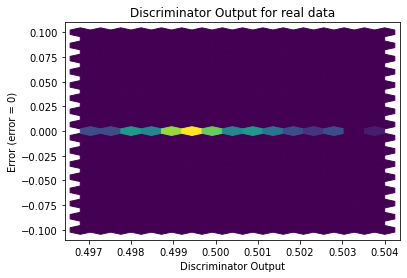

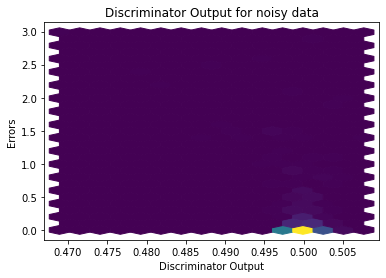

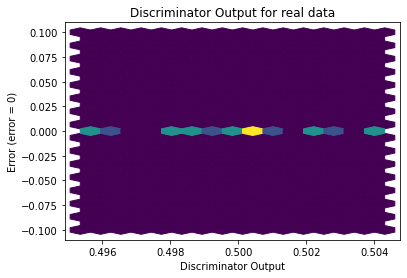

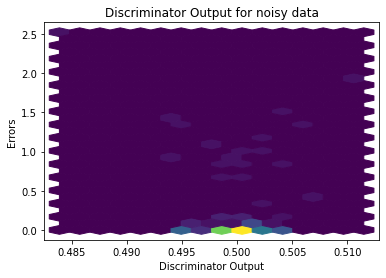

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0848]], requires_grad=True)
